In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import asarray 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
ev_data = pd.read_csv('ElectricCarData_Clean.csv')
ev_data.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [64]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [65]:
object_column = ev_data.select_dtypes(include ='object')
object_column.head()

,Brand,Model,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment
0,Tesla,Model 3 Long Range Dual Motor,940,Yes,AWD,Type 2 CCS,Sedan,D
1,Volkswagen,ID.3 Pure,250,Yes,RWD,Type 2 CCS,Hatchback,C
2,Polestar,2,620,Yes,AWD,Type 2 CCS,Liftback,D
3,BMW,iX3,560,Yes,RWD,Type 2 CCS,SUV,D
4,Honda,e,190,Yes,RWD,Type 2 CCS,Hatchback,B


In [66]:
#Ecoding categorical columns

ev1 = ev_data[['Brand', 'Model', 'RapidCharge', 'PlugType', 'BodyStyle', 'Segment', 'PowerTrain']]
print(ev1)

#define ordinal encoding
encoder = OrdinalEncoder()

#transform data
result = encoder.fit_transform(ev1)
print(result)

           Brand                            Model RapidCharge    PlugType  \
0         Tesla     Model 3 Long Range Dual Motor         Yes  Type 2 CCS   
1    Volkswagen                         ID.3 Pure         Yes  Type 2 CCS   
2      Polestar                                 2         Yes  Type 2 CCS   
3           BMW                              iX3          Yes  Type 2 CCS   
4         Honda                                e          Yes  Type 2 CCS   
..           ...                              ...         ...         ...   
98       Nissan                       Ariya 63kWh         Yes  Type 2 CCS   
99         Audi     e-tron S Sportback 55 quattro         Yes  Type 2 CCS   
100      Nissan               Ariya e-4ORCE 63kWh         Yes  Type 2 CCS   
101      Nissan   Ariya e-4ORCE 87kWh Performance         Yes  Type 2 CCS   
102       Byton                 M-Byte 95 kWh 2WD         Yes  Type 2 CCS   

     BodyStyle Segment PowerTrain  
0        Sedan       D        AWD  
1  

In [67]:
temp =['Brand', 'Model', 'RapidCharge', 'PlugType', 'BodyStyle', 'Segment', 'PowerTrain']
ev_data.drop(temp, axis=1, inplace = True)
result = pd.DataFrame(result)

In [68]:
result.columns= ['Brand', 'Model', 'RapidCharge', 'PlugType', 'BodyStyle', 'Segment', 'PowerTrain']
result.index+=1

In [69]:
result

,Brand,Model,RapidCharge,PlugType,BodyStyle,Segment,PowerTrain
1,30.0,46.0,1.0,2.0,7.0,3.0,0.0
2,31.0,33.0,1.0,2.0,1.0,2.0,2.0
3,23.0,0.0,1.0,2.0,2.0,3.0,0.0
4,2.0,101.0,1.0,2.0,6.0,3.0,2.0
5,9.0,78.0,1.0,2.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...
99,20.0,6.0,1.0,2.0,1.0,2.0,1.0
100,1.0,94.0,1.0,2.0,6.0,4.0,0.0
101,20.0,8.0,1.0,2.0,1.0,2.0,0.0
102,20.0,10.0,1.0,2.0,1.0,2.0,0.0


In [70]:
ev1 =ev_data
ev1.index+=1

In [71]:
ev1[['Brand', 'Model', 'RapidCharge', 'PlugType', 'BodyStyle', 'Segment', 'PowerTrain']] = result[['Brand', 'Model', 'RapidCharge', 'PlugType', 'BodyStyle', 'Segment', 'PowerTrain']]
ev_data

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro,Brand,Model,RapidCharge,PlugType,BodyStyle,Segment,PowerTrain
1,4.6,233,450,161,940,5,55480,30.0,46.0,1.0,2.0,7.0,3.0,0.0
2,10.0,160,270,167,250,5,30000,31.0,33.0,1.0,2.0,1.0,2.0,2.0
3,4.7,210,400,181,620,5,56440,23.0,0.0,1.0,2.0,2.0,3.0,0.0
4,6.8,180,360,206,560,5,68040,2.0,101.0,1.0,2.0,6.0,3.0,2.0
5,9.5,145,170,168,190,4,32997,9.0,78.0,1.0,2.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,7.5,160,330,191,440,5,45000,20.0,6.0,1.0,2.0,1.0,2.0,1.0
100,4.5,210,335,258,540,5,96050,1.0,94.0,1.0,2.0,6.0,4.0,0.0
101,5.9,200,325,194,440,5,50000,20.0,8.0,1.0,2.0,1.0,2.0,0.0
102,5.1,200,375,232,450,5,65000,20.0,10.0,1.0,2.0,1.0,2.0,0.0


In [72]:
#check the correlation between different features
ev_data.corr()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro,Brand,Model,RapidCharge,PlugType,BodyStyle,Segment,PowerTrain
AccelSec,1.000000,-0.786195,-0.677062,-0.382904,-0.175335,-0.627174,0.062730,-0.050635,-0.514820,-0.259657,-0.347164,-0.451568,0.521011
TopSpeed_KmH,-0.786195,1.000000,0.746662,0.355675,0.126470,0.829057,0.101759,0.067814,0.251054,-0.010110,0.339230,0.670403,-0.560538
Range_Km,-0.677062,0.746662,1.000000,0.313077,0.300163,0.674844,0.088316,-0.066035,0.401290,0.131297,0.227477,0.628597,-0.451495
Efficiency_WhKm,-0.382904,0.355675,0.313077,1.000000,0.301230,0.396705,-0.195901,0.010976,0.105673,-0.028761,0.373146,0.623263,-0.394721
Seats,-0.175335,0.126470,0.300163,0.301230,1.000000,0.020920,0.089589,-0.018943,0.423111,-0.029570,0.342489,0.416744,-0.278882
PriceEuro,-0.627174,0.829057,0.674844,0.396705,0.020920,1.000000,-0.036023,0.169003,0.197208,-0.000193,0.321713,0.737106,-0.561584
Brand,0.062730,0.101759,0.088316,-0.195901,0.089589,-0.036023,1.000000,-0.401572,-0.188137,-0.231104,-0.275860,-0.002040,0.056464
Model,-0.050635,0.067814,-0.066035,0.010976,-0.018943,0.169003,-0.401572,1.000000,0.144293,0.023750,0.261255,0.068414,-0.007609
RapidCharge,-0.514820,0.251054,0.401290,0.105673,0.423111,0.197208,-0.188137,0.144293,1.000000,0.539160,0.223577,0.189954,-0.274797
PlugType,-0.259657,-0.010110,0.131297,-0.028761,-0.029570,-0.000193,-0.231104,0.023750,0.539160,1.000000,0.066463,-0.163959,-0.039763


In [73]:
corr_matrix = ev_data.corr()

In [74]:
corr_matrix['Range_Km']

AccelSec          -0.677062
TopSpeed_KmH       0.746662
Range_Km           1.000000
Efficiency_WhKm    0.313077
Seats              0.300163
PriceEuro          0.674844
Brand              0.088316
Model             -0.066035
RapidCharge        0.401290
PlugType           0.131297
BodyStyle          0.227477
Segment            0.628597
PowerTrain        -0.451495
Name: Range_Km, dtype: float64

<AxesSubplot:>

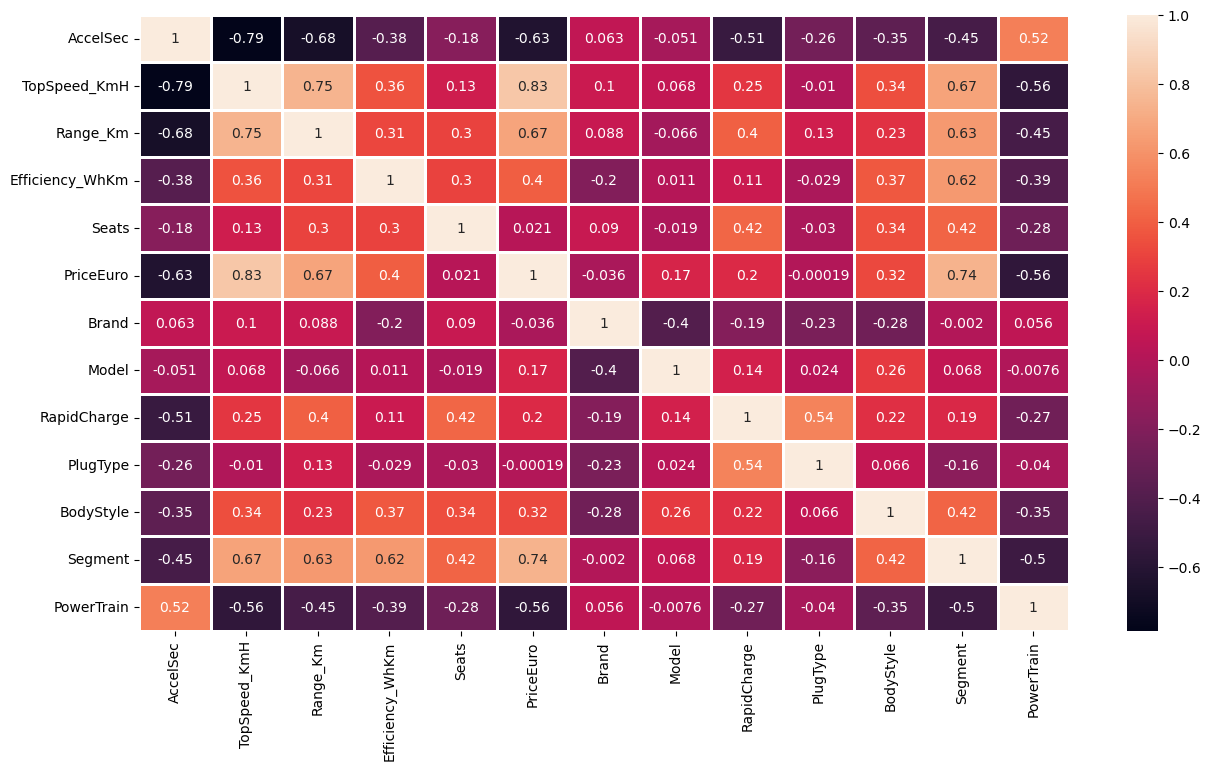

In [75]:
#Heatmap to show the correlation of the data
a = plt.figure(figsize=(15,8))
sns.heatmap(ev_data.corr(), linewidths=1,linecolor='white',annot=True)

In [76]:
# select relevant features for predicting range and efficiency

features = ['TopSpeed_KmH', 'PriceEuro', 'Segment', 'RapidCharge', 'Efficiency_WhKm', 'Seats', 'BodyStyle', 'PlugType', 'Brand']
target_range = 'Range_Km'
target_efficiency = 'Efficiency_WhKm'

In [77]:
# Model Building
# split the data into training and testing sets

from sklearn.model_selection import train_test_split

X = ev_data[features]
y_range = ev_data[target_range]
y_efficiency = ev_data[target_efficiency]

X_train, X_test, y_train_range, y_test_range = train_test_split(X, y_range, test_size = 0.2, random_state = 42)
X_train, X_test, y_train_efficiency, y_test_efficiency = train_test_split(X, y_efficiency, test_size = 0.2, random_state = 42)

In [78]:
#Linear regression for range
lr_range = LinearRegression()
lr_range.fit(X_train, y_train_range)

#Random Forest for Efficiency
rf_efficiency =RandomForestRegressor(n_estimators=100, random_state =42)
rf_efficiency.fit(X_train, y_train_efficiency)

RandomForestRegressor(random_state=42)

In [79]:
#Model Evaluation
#Used metrics like Mean Square error and R-square to evaluate the models

y_pred_range = lr_range.predict(X_test)
y_pred_efficiency = rf_efficiency.predict(X_test)

#Evaluation for range
mse_range = mean_squared_error(y_test_range, y_pred_range)
r2_range = r2_score(y_test_range, y_pred_range)
print(f'Range - MSE: {mse_range}, R-squared: {r2_range}')

#Evaluation for efficiency
mse_efficiency = mean_squared_error(y_test_efficiency, y_pred_efficiency)
r2_efficiency = r2_score(y_test_efficiency, y_pred_efficiency)
print(f'Efficiency - MSE: {mse_efficiency}, R-squared: {r2_efficiency}')

Range - MSE: 10050.67801109008, R-squared: 0.24338112990718397
Efficiency - MSE: 21.411466666666644, R-squared: 0.981234584565487
